In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# checking the number whose hvae heart disease and whose have not.
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

0 = healthy heart,

1 = defective heart

In [8]:
defective = df[df.target==0]
healthy = df[df.target==1]

In [9]:
print(defective.shape)
print(healthy.shape)

(499, 14)
(526, 14)


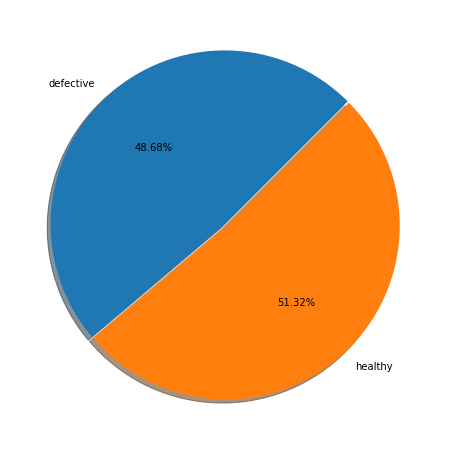

In [10]:
%matplotlib inline
fig, ax1= plt.subplots(figsize=(8,8))
label = ['defective','healthy']
value=[499,526]
ax1.pie(x=value, labels=label, autopct='%.2f%%', shadow=True, startangle=45, explode=[0,.01])
plt.show()

In [13]:
#spliting the data for training and testing
X=df.drop(columns='target',axis=1)
Y=df['target']

In [14]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, stratify=Y, random_state=2)

In [32]:
print(x.shape)
print(X_train.shape)
print(X_test.shape)

(1025, 13)
(820, 13)
(205, 13)


In [59]:
# model training using logistic regression
model = LogisticRegression()

In [60]:
model.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
# accuracy score for training data and testing data
X_train_prediction=model.predict(X_train)
X_training_accuracy=accuracy_score(X_train_prediction,Y_train)

X_test_prediction=model.predict(X_test)
X_testing_accuracy=accuracy_score(X_test_prediction,Y_test)


In [62]:
print('Accuracy score for training data: ',X_training_accuracy)
print('Accuracy score for testing data: ',X_testing_accuracy)

Accuracy score for training data:  0.8524390243902439
Accuracy score for testing data:  0.8048780487804879


In [68]:
# check people have defectve heart or healthy using a random data
input_data=(52,1,0,125,212,0,1,168,0,1.0,2,2,3)

#changing into numpy array
numpy_array= np.array(input_data)

#reshape data
data_reshape= numpy_array.reshape(1,-1)

prediction=model.predict(data_reshape)
print(prediction)

if(prediction[0]==0):
    print('The person has healthy heart')
else:
    print('The person has heart disease')

[0]
The person has healthy heart


In [53]:
# model training Using random forest
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()
rclf.fit(X_train, Y_train)

RandomForestClassifier()

In [54]:
# accuracy score for training data and testing data
X_train_prediction=rclf.predict(X_train)
X_training_accuracy=accuracy_score(X_train_prediction,Y_train)

X_test_prediction=rclf.predict(X_test)
X_testing_accuracy=accuracy_score(X_test_prediction,Y_test)

In [55]:
print('Accuracy score for training data: ',X_training_accuracy)
print('Accuracy score for testing data: ',X_testing_accuracy)

Accuracy score for training data:  1.0
Accuracy score for testing data:  1.0


In [56]:
# using decisin tree
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier()
dclf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [57]:
# accuracy score for training data and testing data
X_train_prediction=dclf.predict(X_train)
X_training_accuracy=accuracy_score(X_train_prediction,Y_train)

X_test_prediction=dclf.predict(X_test)
X_testing_accuracy=accuracy_score(X_test_prediction,Y_test)

In [58]:
print('Accuracy score for training data: ',X_training_accuracy)
print('Accuracy score for testing data: ',X_testing_accuracy)

Accuracy score for training data:  1.0
Accuracy score for testing data:  1.0
